**Implemented in google colab as file is too big.This is a classification problem and I have choosen Accuracy as my evaluation metric**

**Wether the 'news' is fake(1) or not fake(0) can be predicted using the model above.**

**Model flow**

1. Read dataset and make it in proper format.
2. Import necessary libraries

# Data Preprocessing

3. checking for NAN values and dropping them as no.s of rows dropped(515) are well within range.

4. Segregating independent feature X ('news')and dependent feature y ('label')

# Again reset_index(both X & y as some NAN features were dropped previously.)

# 5. Initializing the Vocabulary size(5000)

# 6. Making of corpus by GENERIC NLP FILTER CODE

a. Convert all cases to lower
b. Remove punctuations
c. Remove Stopwords

7. OneHot Encoding(or dummies)

8. Word Embedding Representation(embedded docs--numerical(vector) format input to any ML or DL model)

# Initializing maximumum length of the sentence(220).by hit and trial.

Our data is now ready for model building process input numerical format

9. Visualizations.

# PART-1--ML model
# Import X(embedded_docs) y( y['label] )

Multiple classifier MODEL BUILDING

10. Train and test split
11. Predicting
12. Check the accuracy/confusion matrix. (accuracy=93.657% )
13. Conclusion.


# PART-2---DL-NN-Model Building(giving better score=91.85%)

# Import X(embedded_docs) y( y['label] )


# Initializing maximumum length of embedding_vector_features=40.
1. From point 8. above # Import X(embedded_docs) y( y['label] )
2. Final conversion to array format which is model input format
3. Train test split
4. Model training(10 epochs)
5. Predicting
6. Check the accuracy/confusion matrix. (accuracy=91.85% )
7. Classification report and visualizations.
8. Conclusion


In [ ]:
#Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
df = pd.read_csv('train_news.csv')

In [ ]:
df.head(10)

Unnamed: 0     id  ...                                               news label
0           0   9653  ...  WASHINGTON  —   In Sonny Perdue’s telling, Geo...     0
1           1  10041  ...  HOUSTON  —   Venezuela had a plan. It was a ta...     0
2           2  19113  ...  Sunday on ABC’s “This Week,” while discussing ...     0
3           3   6868  ...  AUGUSTA, Me.  —   The beleaguered Republican g...     0
4           4   7596  ...    Finian Cunningham has written extensively on...     1
5           5   3196  ...  Taming the corporate media beast Whatever the ...     1
6           6   5134  ...  The State of New Jersey says you can’t eat the...     0
7           7   1504  ...  Advocates say prison officials at the Kilby Co...     1
8           8  13559  ...  People have made up their minds on president.\...     1
9           9   4203  ...  Leave a reply \nToni Emerson – When we fall in...     1

[10 rows x 6 columns]

In [ ]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [ ]:
df.shape

(20800, 6)

**Dropping rows containing NAN**

In [ ]:
###Drop Nan Values
df=df.dropna()


In [ ]:
df.shape  #(20800-18285)data loss which is well within range of 10 to 15%

(18285, 6)

In [ ]:
df.head(10)

Unnamed: 0     id  ...                                               news label
0            0   9653  ...  WASHINGTON  —   In Sonny Perdue’s telling, Geo...     0
1            1  10041  ...  HOUSTON  —   Venezuela had a plan. It was a ta...     0
2            2  19113  ...  Sunday on ABC’s “This Week,” while discussing ...     0
3            3   6868  ...  AUGUSTA, Me.  —   The beleaguered Republican g...     0
4            4   7596  ...    Finian Cunningham has written extensively on...     1
6            6   5134  ...  The State of New Jersey says you can’t eat the...     0
7            7   1504  ...  Advocates say prison officials at the Kilby Co...     1
9            9   4203  ...  Leave a reply \nToni Emerson – When we fall in...     1
10          10  11136  ...  BREAKING: Clinton Fixer Reveals Sick Smear Hil...     1
11          11   2150  ...  Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...     1

[10 rows x 6 columns]

**Segregating X and y**

In [ ]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [ ]:
## Get the Dependent features
y=df[['label']]

In [ ]:
y['label']

0        0
1        0
2        0
3        0
4        1
        ..
20794    0
20796    1
20797    1
20798    0
20799    0
Name: label, Length: 18285, dtype: int64

**Reset index again after dropping NAN rows**

In [ ]:
X.reset_index(inplace=True)
y.reset_index(inplace=True)

In [ ]:
X.head(10)

index  ...                                               news
0      0  ...  WASHINGTON  —   In Sonny Perdue’s telling, Geo...
1      1  ...  HOUSTON  —   Venezuela had a plan. It was a ta...
2      2  ...  Sunday on ABC’s “This Week,” while discussing ...
3      3  ...  AUGUSTA, Me.  —   The beleaguered Republican g...
4      4  ...    Finian Cunningham has written extensively on...
5      6  ...  The State of New Jersey says you can’t eat the...
6      7  ...  Advocates say prison officials at the Kilby Co...
7      9  ...  Leave a reply \nToni Emerson – When we fall in...
8     10  ...  BREAKING: Clinton Fixer Reveals Sick Smear Hil...
9     11  ...  Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...

[10 rows x 6 columns]

In [ ]:
y.head(10)

index  label
0      0      0
1      1      0
2      2      0
3      3      0
4      4      1
5      6      0
6      7      1
7      9      1
8     10      1
9     11      1

In [ ]:
y['label'].value_counts()#not much Imbalanced dataset(43-57 ratio)

0    10361
1     7924
Name: label, dtype: int64

In [ ]:
X.shape

(18285, 6)

In [ ]:
y.shape

(18285, 2)

### Initializing the Vocabulary size

In [ ]:
### Initializing the Vocabulary size
voc_size=5000

**Making of corpus " LIST " by GENERIC NLP FILTER CODE**

In [ ]:
messages=X.copy()

In [ ]:
messages[:10]

index  ...                                               news
0      0  ...  WASHINGTON  —   In Sonny Perdue’s telling, Geo...
1      1  ...  HOUSTON  —   Venezuela had a plan. It was a ta...
2      2  ...  Sunday on ABC’s “This Week,” while discussing ...
3      3  ...  AUGUSTA, Me.  —   The beleaguered Republican g...
4      4  ...    Finian Cunningham has written extensively on...
5      6  ...  The State of New Jersey says you can’t eat the...
6      7  ...  Advocates say prison officials at the Kilby Co...
7      9  ...  Leave a reply \nToni Emerson – When we fall in...
8     10  ...  BREAKING: Clinton Fixer Reveals Sick Smear Hil...
9     11  ...  Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...

[10 rows x 6 columns]

In [ ]:
messages['news'][0]

'WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor. Mr

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Generic NLP Filter Code**

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [ ]:
corpus[0]#Each word will be converted to a vector(numerical) by one hot encoding below

'washington sonni perdu tell georgian grow weari corrupt scandal state took governor time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end complaint file mr perdu state ethic commiss two occas rule governor violat state ethic law commiss took unusu step fine mr perdu governor numer question 

# One hot encoding (Each word inside corpus is given different numbers.)

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot                          
                          #Initialized above
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4647,
  4341,
  3526,
  4922,
  712,
  2073,
  2116,
  4771,
  2299,
  3958,
  3375,
  4044,
  3630,
  523,
  956,
  659,
  4095,
  1341,
  1877,
  4014,
  4044,
  1981,
  4783,
  3467,
  3958,
  3663,
  3597,
  3618,
  3958,
  3663,
  4710,
  3526,
  1994,
  3916,
  3117,
  1144,
  3958,
  2320,
  3691,
  1053,
  3663,
  4173,
  3744,
  3026,
  3467,
  2288,
  3663,
  2288,
  2120,
  1581,
  3663,
  4710,
  3526,
  858,
  648,
  2171,
  2704,
  3356,
  2891,
  2282,
  29,
  2546,
  2098,
  851,
  872,
  256,
  3962,
  6,
  1341,
  3843,
  4600,
  4044,
  872,
  3217,
  1849,
  4710,
  2891,
  4779,
  3917,
  2039,
  4832,
  312,
  2436,
  2900,
  3689,
  2704,
  4044,
  4710,
  3526,
  2684,
  2703,
  3724,
  3545,
  648,
  779,
  2171,
  4318,
  3330,
  2171,
  908,
  907,
  2130,
  4852,
  3418,
  3713,
  1633,
  1731,
  3663,
  6,
  2464,
  2527,
  1731,
  4989,
  2941,
  4710,
  3526,
  4638,
  352,
  83,
  4326,
  2039,
  2920,
  4891,
  701,
  1518,
  1508,
  872,
  3840,
  51

In [ ]:
onehot_repr[0]#Each word in 1st sentence in corpus list we created is converted to a numeric representation.

[4647,
 4341,
 3526,
 4922,
 712,
 2073,
 2116,
 4771,
 2299,
 3958,
 3375,
 4044,
 3630,
 523,
 956,
 659,
 4095,
 1341,
 1877,
 4014,
 4044,
 1981,
 4783,
 3467,
 3958,
 3663,
 3597,
 3618,
 3958,
 3663,
 4710,
 3526,
 1994,
 3916,
 3117,
 1144,
 3958,
 2320,
 3691,
 1053,
 3663,
 4173,
 3744,
 3026,
 3467,
 2288,
 3663,
 2288,
 2120,
 1581,
 3663,
 4710,
 3526,
 858,
 648,
 2171,
 2704,
 3356,
 2891,
 2282,
 29,
 2546,
 2098,
 851,
 872,
 256,
 3962,
 6,
 1341,
 3843,
 4600,
 4044,
 872,
 3217,
 1849,
 4710,
 2891,
 4779,
 3917,
 2039,
 4832,
 312,
 2436,
 2900,
 3689,
 2704,
 4044,
 4710,
 3526,
 2684,
 2703,
 3724,
 3545,
 648,
 779,
 2171,
 4318,
 3330,
 2171,
 908,
 907,
 2130,
 4852,
 3418,
 3713,
 1633,
 1731,
 3663,
 6,
 2464,
 2527,
 1731,
 4989,
 2941,
 4710,
 3526,
 4638,
 352,
 83,
 4326,
 2039,
 2920,
 4891,
 701,
 1518,
 1508,
 872,
 3840,
 51,
 1318,
 4044,
 3737,
 2472,
 4402,
 4710,
 3526,
 3958,
 6,
 4159,
 2465,
 2472,
 4327,
 4044,
 3563,
 3958,
 6,
 263,
 4159,
 

### Word Embedding Representation

In [ ]:
max(corpus)

'zu wild geschaukelt spielend kind st rzt benachbart hirschgeheg miro love klose stellt neue freundin vor einmal drin all hin elef kauft bei real viel er anbohrt flei iger heimwerk seenot k lsch besser schnell trinken bevor es alt wird kein disco sohn vater debattiert nicht wegen parti verbot salami tik tak ferrero l ftet geheimni um neue drage mit wurstgeschmack nur scheibchenweis kli sod tsc oga tom huh evw adl jetzt bestellen der postillon newstick kalend nur der postillon newstick artikel teilen'

In [ ]:
len(max(corpus))

503

**Initializing maximumum length of the sentence(no.of features selected).**

In [ ]:
#fixing the maximum length of the sentence so that maximum relevant words are selected.select accordig to max.length of sentence=503.
sent_length=220 #I had=220 by----> hit and trial to get this hghest accuracy of around 63%

##Embedding and padding along with onehotencoded data we did above, all incorporaed together.
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[3225 3499 2464 ... 3840 4341 2122]
 [3283 4537 3341 ... 2839  321  321]
 [   0    0    0 ...  637 3749 4851]
 ...
 [1790 4566 1455 ... 4788 1102  553]
 [4932 3302 2947 ...  307 3026 1134]
 [   0    0    0 ... 4920  636 4659]]


In [ ]:
embedded_docs[0]#There are 220 different numbers assigned to 220 words in the 1st sentence.

#This embedded_docs will be used in train_test_split below after the visualizations.

array([3225, 3499, 2464, 4710, 3526, 1522, 4710, 4199, 2704, 3483, 2900,
       4044, 3286,  424, 3041, 2370, 4710, 4199, 3439, 4710, 4199, 2310,
       4965, 4710, 3526, 2637,  493,   14, 2299, 2929, 3958,  624, 4815,
        191,  856, 4784, 2937, 3579, 4656, 4035, 4762, 3134,  234, 3499,
       4601,   86,  775, 4710, 3526, 4499, 4499,  327,  953, 3236, 1633,
       1974,  199,  624, 3531, 4601, 4339, 4175, 4864, 3498, 4305, 4255,
       2753, 4710, 3526, 1645, 1670, 4339, 3958,  624, 4710, 3526, 3633,
       3274, 1373, 4600,  640, 3958,  624, 4640, 3958,  263, 3597,  327,
       4242,  294, 1974,  199, 4154, 2516,   86, 4499, 3958, 2477, 4784,
        916,  415, 3545, 4339, 2079,  656, 4035, 2929, 4844, 3630, 4762,
       3134, 4710, 3526, 4882, 1039, 3597, 2277,  223, 4783, 1970, 4602,
       4710, 3526, 4175, 2253, 1688, 4044,  226, 3630, 4710, 3526, 1682,
       3439, 3597, 3958,  263, 2518, 2982, 4710, 3526, 2982,  712, 1455,
       3439, 4951, 3345, 4241, 2929,  337,  489, 38

In [ ]:
embedded_docs.shape

(18285, 220)

In [ ]:
embedded_docs=pd.DataFrame(data=embedded_docs)

**Saving the cleaned data for future use**

In [ ]:
embedded_docs.to_csv('cleaned data fakenews')

In [ ]:
y.to_csv('cleaned data fakenews(y)target')

## **Our data is now ready for model building process in input numerical format** 

# **Visualizations**

In [ ]:
import matplotlib.pyplot as plt


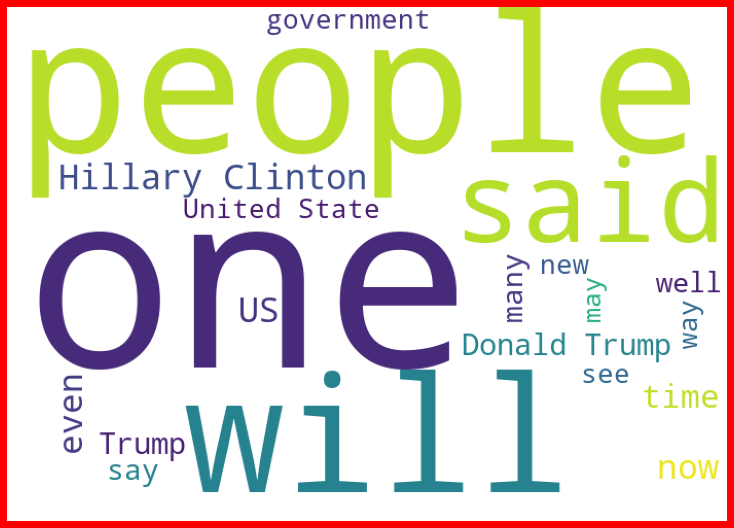

In [ ]:

from wordcloud import WordCloud


fake = messages['news'][y['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can clearly see, some of the words like "people, said,will,may etc" are indication of fake news.

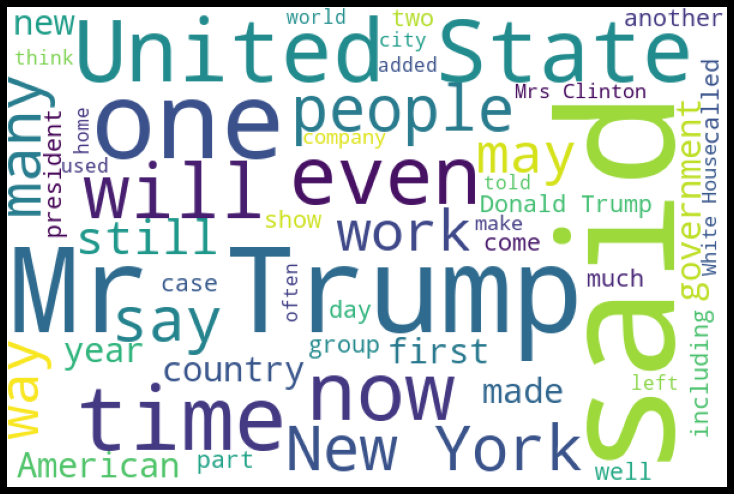

In [ ]:
#Getting sense of loud words in good new(not fake new) 

notfake = messages['news'][y['label']==0]
notfake_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(notfake))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(notfake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Importing the cleaned dataset saved above for Part-1-ML Model
GithubLink-

Importing the cleaned dataset saved above for Part-2-DL-NN Model
GithubLink-